In [58]:

import pandas as pd

# 엑셀 파일 불러오기
white_df = pd.read_csv(r'C:\Users\USER\Documents\withskin_project\white_summary.csv')

# 데이터 확인
print(white_df.head())

                  파일명      홍조비율
0  white_0529_204.png  0.057586
1  white_0529_205.png  0.000218
2  white_0529_206.png  0.000034
3  white_0529_207.png  0.000121
4  white_0529_208.png  0.179360


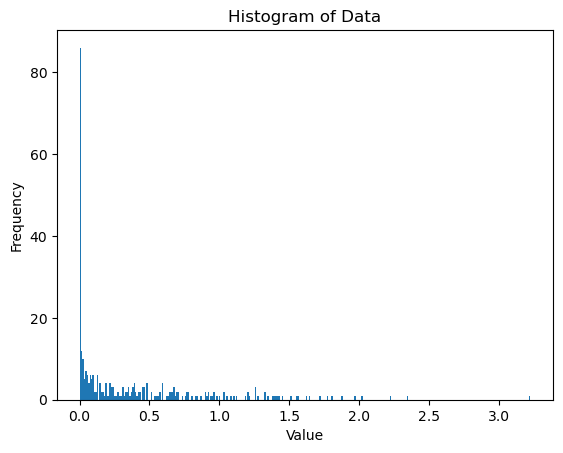

In [59]:
import matplotlib.pyplot as plt

data = white_df['홍조비율']  # 데이터 리스트
num_bins = len(data)

plt.hist(data, bins=num_bins)  # 데이터를 10개의 구간으로 나누어 히스토그램을 그립니다.
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.title('Histogram of Data')  # 그래프 제목 설정

plt.show()

In [60]:
# white_157.png

desired_filename = 'white_157.png'

In [61]:
# 열의 평균 계산
mean_value = white_df['홍조비율'].mean()

# 열의 최솟값 계산
min_value = white_df['홍조비율'].min()

# 열의 최댓값 계산
max_value = white_df['홍조비율'].max()

In [62]:
print("Mean:", mean_value)
print("Minimum:", min_value)
print("Maximum:", max_value)

Mean: 0.38395549365973
Minimum: 0.0
Maximum: 3.2256007388919734


In [63]:
result = white_df.loc[white_df['파일명'] == desired_filename]  # filename 열에서 desired_filename과 일치하는 행을 찾습니다.
print(result)  # 결과값 출력


               파일명      홍조비율
178  white_157.png  0.376846


- 최솟값 0, 최댓값 4
- 홍조가 진할수록 4 연할수록 0에 가까움

- 점수화를 위해 최댓값인 4를 빼서 수치를 반전함
- 홍조가 진할수록 점수가 낮기 때문

In [64]:
import pandas as pd

# DataFrame에서 특정 컬럼 선택
column_name = '홍조비율'  # 점수화할 컬럼의 이름
selected_column = white_df[column_name]

# 점수 계산
scores = (4 - selected_column)

# 스케일링된 결과를 원본 DataFrame에 반영
white_df[column_name] = scores

# 결과 출력
white_df

,파일명,홍조비율
0,white_0529_204.png,3.942414
1,white_0529_205.png,3.999782
2,white_0529_206.png,3.999966
3,white_0529_207.png,3.999879
4,white_0529_208.png,3.820640
...,...,...
312,white_95.png,3.999988
313,white_96.png,4.000000
314,white_97.png,2.127019
315,white_98.png,3.487922


In [65]:
# 열의 평균 계산
mean_value = white_df['홍조비율'].mean()

# 열의 최솟값 계산
min_value = white_df['홍조비율'].min()

# 열의 최댓값 계산
max_value = white_df['홍조비율'].max()

# 열의 사분위수 계산
quantiles = white_df['홍조비율'].quantile([0.25, 0.5, 0.75, 0.01, 0.9])

print("Mean:", mean_value)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("25th Percentile:", quantiles[0.25])
print("50th Percentile (Median):", quantiles[0.5])
print("75th Percentile:", quantiles[0.75])
print("90th Percentile:", quantiles[0.9])

Mean: 3.616044506340271
Minimum: 0.7743992611080266
Maximum: 4.0
25th Percentile: 3.405612927660649
50th Percentile (Median): 3.850646220640915
75th Percentile: 3.9921749563926774
90th Percentile: 3.999994278164435


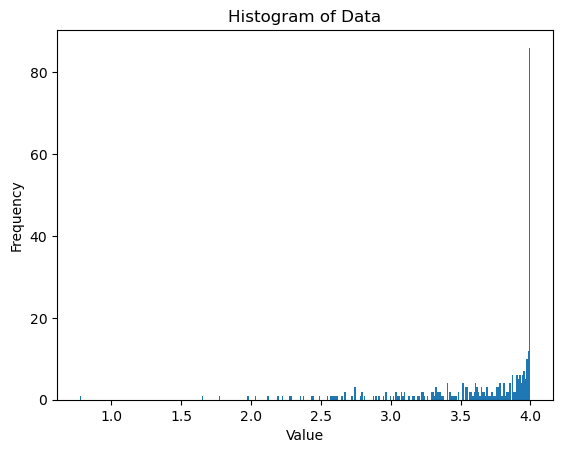

In [66]:
import matplotlib.pyplot as plt

data = white_df['홍조비율']  # 데이터 리스트
num_bins = len(data)

plt.hist(data, bins=num_bins)  # 데이터를 10개의 구간으로 나누어 히스토그램을 그립니다.
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.title('Histogram of Data')  # 그래프 제목 설정

plt.show()

홍조의 진하기에 따라 4가지 구간으로 나눌 수 있음. 이를 바탕으로 점수 범위 구분

- 0 - 1 사이: 25점
- 1 - 2 사이: 50점
- 2 - 3 사이: 75점
- 3 - 4 사이: 100점

4개의 구간으로 점수 범위를 구분함

In [67]:
import pandas as pd

# 통계 값 정의
Mean= 3.616044506340271
Minimum= 0
Maximum= 4.0
s25 = 1
s50 = 2
s75= 3


# 세분화된 점수를 구 함수 정의
def convert_to_fine_score(redness_value):
    if Minimum <= redness_value <= s25:  # 0 - 25점 구간
        score = ((redness_value - Minimum) / (s25 - Minimum) * 25)
    elif p25 < redness_value <= p50:  # 26 - 50점 구간
        score = (25 + ((redness_value - s25) / (sp50 - s25)) * 25)
    elif p50 < redness_value <= p75:  #  - 75점 구간
        score = (50 + ((redness_value - s50) / (s75 - s50)) * 25)
    elif p75 < redness_value <= Maximum:  # 76 - 100점 구간
        score = (75 + ((redness_value - s75) / (Maximum - s75)) * 25)
    else:
        return None

    return score


# 홍조비율 열의 데이터 값을 세분화된 점수로 환산하여 새 열 '홍조점수'에 추가
white_df['세분화_홍조점수'] = white_df['홍조비율'].apply(convert_to_fine_score)

NameError: name 'sp50' is not defined

In [ ]:
white_df

,파일명,홍조비율,세분화_홍조점수
0,white_0529_204.png,3.942414,98.560351
1,white_0529_205.png,3.999782,99.994538
2,white_0529_206.png,3.999966,99.999155
3,white_0529_207.png,3.999879,99.996966
4,white_0529_208.png,3.820640,95.515988
...,...,...,...
312,white_95.png,3.999988,99.999697
313,white_96.png,4.000000,100.000000
314,white_97.png,2.127019,53.175469
315,white_98.png,3.487922,87.198056


In [ ]:
rounded_value = round(white_df['세분화_홍조점수']) # 첫째 자리에서 반올림
print("반올림한 점수:",rounded_value)

반올림한 점수: 0       99.0
1      100.0
2      100.0
3      100.0
4       96.0
       ...  
312    100.0
313    100.0
314     53.0
315     87.0
316     98.0
Name: 세분화_홍조점수, Length: 317, dtype: float64


In [ ]:
# white_157.png

desired_filename = 'white_157.png'

In [ ]:
result = white_df.loc[white_df['파일명'] == desired_filename]  # filename 열에서 desired_filename과 일치하는 행을 찾습니다.
print(result)  # 결과값 출력





               파일명      홍조비율   세분화_홍조점수
178  white_157.png  3.623154  90.578841
